# Exploration for generating the distance matrix

# Example usage of osmnx
Code taken from https://stackoverflow.com/questions/36994746/how-to-find-path-and-distance-between-two-coordinates-using-osm-and-python

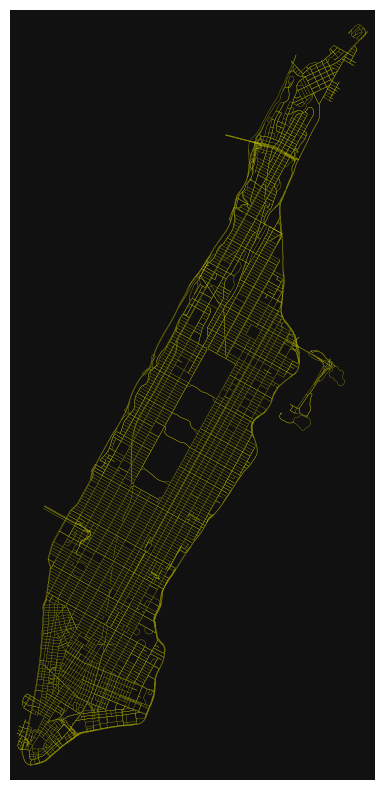

In [2]:
import osmnx as ox
import networkx as nx
from datetime import timedelta


# The place where your 2 points are located. It will be used to create a graph from the OSM data
# In this example, the 2 points are two addresses in Manhattan, so we choose "Manhattan"
# It could be a bounding box too, or an area around a point
graph_area = ("Manhattan, New York, USA")

# Create the graph of the area from OSM data. It will download the data and create the graph
G = ox.graph_from_place(graph_area, network_type='drive')
# (For a better accuracy, create a graph with lot more nodes:)
#G = ox.graph_from_place(graph_area, network_type='drive', simplify=False)

# OSM data are sometime incomplete so we use the speed module of osmnx to add missing edge speeds and travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# Save graph to disk if you want to reuse it
# ox.save_graphml(G, "Manhattan.graphml")

# Load the graph
G = ox.load_graphml("Manhattan.graphml")

# Plot the graph
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color='y', edge_linewidth=0.2)

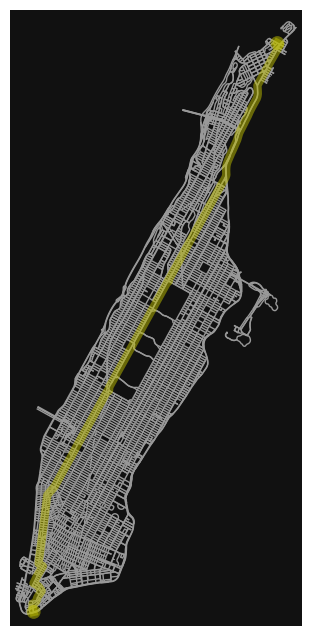

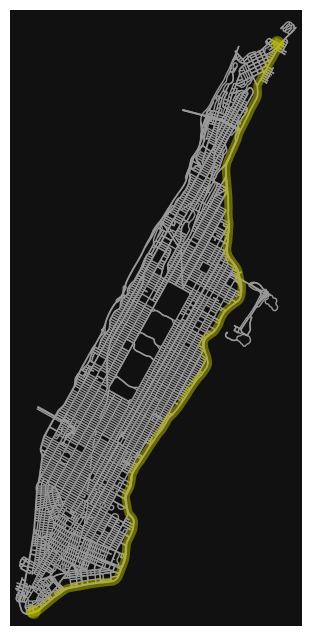

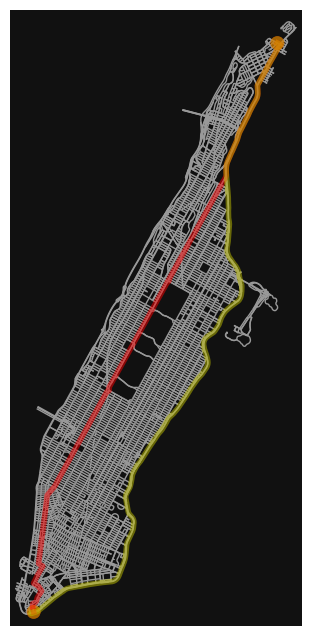

travel time in seconds 1376.941917248264
travel time in hours minutes seconds 0:22:56.941917
distance in meters 21414.177559893356
distance in kilometers 21.414177559893357


In [3]:
# Two pairs of (lat,lng) coordinates
origin_coordinates = (40.70195053163349, -74.01123198479581)
destination_coordinates = (40.87148739347057, -73.91517498611597)

# If you want to take an address (osmx will use Nominatim service for this)
# origin_coordinates = ox.geocode("2 Broad St, New York, NY 10005")

# In the graph, get the nodes closest to the points
origin_node = ox.nearest_nodes(G, Y=origin_coordinates[0], X=origin_coordinates[1])
destination_node = ox.nearest_nodes(G, Y=destination_coordinates[0], X=destination_coordinates[1])


# Get the shortest route by distance
shortest_route_by_distance = ox.shortest_path(G, origin_node, destination_node, weight='length')

# Plot the shortest route by distance
fig, ax = ox.plot_graph_route(G, shortest_route_by_distance, route_color='y', route_linewidth=6, node_size=0)

# Get the shortest route by travel time
shortest_route_by_travel_time = ox.shortest_path(G, origin_node, destination_node, weight='travel_time')

# Plot the shortest route by travel time
fig, ax = ox.plot_graph_route(G, shortest_route_by_travel_time, route_color='y', route_linewidth=6, node_size=0)

# Plot the 2 routes
fig, ax = ox.plot_graph_routes(G, routes=[shortest_route_by_distance, shortest_route_by_travel_time], route_colors=['r', 'y'], route_linewidth=6, node_size=0)

# Get the travel time, in seconds
# Note here that we use "nx" (networkx), not "ox" (osmnx)
travel_time_in_seconds = nx.shortest_path_length(G, origin_node, destination_node, weight='travel_time')
print("travel time in seconds", travel_time_in_seconds)

#The travel time in "HOURS:MINUTES:SECONDS" format
travel_time_in_hours_minutes_seconds = str(timedelta(seconds=travel_time_in_seconds))
print("travel time in hours minutes seconds", travel_time_in_hours_minutes_seconds)

# Get the distance in meters
distance_in_meters = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
print("distance in meters", distance_in_meters)
# Distance in kilometers
distance_in_kilometers = distance_in_meters / 1000
print("distance in kilometers", distance_in_kilometers)